# 축제 기간 중 하루(230903)에 대해 EDA, 연령대별 분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings(action='ignore')

In [3]:
from mpl_toolkits.mplot3d import Axes3D

In [4]:
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

In [5]:
df_od_0903 = pd.read_csv("od_20230901_10/od_20230903_1.csv")
df_od_0903.head()

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
0,4729054100,4729054200,20230903,14:00,14:00,0,6,0.0,0.0,0,3850,10,6
1,1123072000,1123073000,20230903,14:00,14:00,0,3,0.0,0.0,0,31896,31,8
2,3114054000,3114057000,20230903,13:00,13:00,1,3,0.0,0.0,3,20707,26,6
3,3014055000,3023060000,20230903,14:00,14:00,1,4,0.0,0.0,4,27531,44,6
4,5123025000,5123057000,20230903,17:00,18:00,0,2,0.0,4.0,0,78444,50,12


In [6]:
df_stay_0903 = pd.read_csv("stay_20230901_15/stay_20230903_1.csv")
df_stay_0903.head()

,hdong_cd,date,time,gender,age,purpose,stay_cnts
0,4122025900,20230903,21:00,1,4,0,1158
1,2917065700,20230903,13:00,0,1,0,1196
2,2915569000,20230903,12:00,1,5,0,1075
3,4711125600,20230903,16:00,1,6,0,1459
4,2820052100,20230903,13:00,1,6,0,697


In [7]:
# 무주축제 관련 데이터만 가져오기

# 무주로 출발 (목적: 여행)
#to_muju = (df_od_0903['dest_hdong_cd'] == 4573025000) & ((df_od_0903['dest_purpose'] == 3) | (df_od_0903['dest_purpose'] == 5)) # 236개 (쇼핑여가제외)
to_muju = (df_od_0903['dest_hdong_cd'] == 4573025000) & (df_od_0903['dest_purpose'] == 5) # 153개 (여행만)

# 무주에서 출발 (목적: 귀가) *일단 제외. 가는 것만 보기
#from_muju = (df_od_0903['origin_hdong_cd'] == 4573025000) & ((df_od_0903['dest_purpose'] == 3) | (df_od_0903['dest_purpose'] == 5))

df_to_muju = df_od_0903[to_muju].sort_values(by='end_time')

df_to_muju

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
257408,4573032000,4573025000,20230903,09:00,09:00,1,0,0.0,0.0,5,7796,22,14
2283351,4573032000,4573025000,20230903,09:00,09:00,0,4,0.0,5.0,5,63205,21,11
2230846,4573032000,4573025000,20230903,09:00,10:00,1,3,0.0,5.0,5,55568,75,9
550354,4573032000,4573025000,20230903,09:00,10:00,1,4,0.0,5.0,5,53475,48,6
2473118,4573032000,4573025000,20230903,09:00,10:00,1,6,0.0,5.0,5,64623,69,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558130,4573033000,4573025000,20230903,19:00,20:00,0,3,0.0,5.0,5,32644,46,6
1540339,4573032000,4573025000,20230903,19:00,20:00,1,3,0.0,5.0,5,65237,44,6
1870243,4573033000,4573025000,20230903,20:00,20:00,0,3,0.0,5.0,5,29972,40,6
122664,4573034000,4573025000,20230903,20:00,21:00,1,0,1.0,5.0,5,18331,23,14


In [10]:
pd.set_option('display.max_rows', None)

df_to_muju

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
257408,4573032000,4573025000,20230903,09:00,09:00,1,0,0.0,0.0,5,7796,22,14
2283351,4573032000,4573025000,20230903,09:00,09:00,0,4,0.0,5.0,5,63205,21,11
2230846,4573032000,4573025000,20230903,09:00,10:00,1,3,0.0,5.0,5,55568,75,9
550354,4573032000,4573025000,20230903,09:00,10:00,1,4,0.0,5.0,5,53475,48,6
2473118,4573032000,4573025000,20230903,09:00,10:00,1,6,0.0,5.0,5,64623,69,5
2005936,4573032000,4573025000,20230903,09:00,10:00,0,0,0.0,5.0,5,50791,42,12
1547621,4573032000,4573025000,20230903,10:00,10:00,1,4,0.0,5.0,5,43710,27,6
1641227,4573032000,4573025000,20230903,09:00,10:00,0,3,0.0,5.0,5,39843,29,9
118783,4471025000,4573025000,20230903,09:00,10:00,1,0,0.0,0.0,5,86529,61,14
1185612,4573033000,4573025000,20230903,09:00,10:00,0,3,0.0,5.0,5,38186,47,6


---

## 1

In [25]:
for column in df_to_muju.columns:
    print(f"Column: {column}")
    print(df_to_muju[column].unique())
    print()  # 빈 줄로 구분

Column: origin_hdong_cd
[4573032000 4471025000 4573033000 4374025000 4573035000 4573031000
 4514061000 4573034000 4374038000 2729062800 3023053300 4159062000
 4785025300 2914075100 3017059000 4420061000 4782036000 4677038000
 1156053500 5113054100 4713065000 4146352000 2729062400 4511165000
 4146125000 3020060000 4611051000 4888025000 4888034000 4580037000
 4420025300]

Column: dest_hdong_cd
[4573025000]

Column: date
[20230903]

Column: start_time
['09:00' '10:00' '11:00' '12:00' '13:00' '14:00' '15:00' '17:00' '16:00'
 '18:00' '19:00' '20:00']

Column: end_time
['09:00' '10:00' '11:00' '12:00' '13:00' '14:00' '15:00' '16:00' '17:00'
 '18:00' '19:00' '20:00' '21:00']

Column: gender
[1 0]

Column: age
[0 4 3 6 5 2 1]

Column: modal
[0. 1.]

Column: origin_purpose
[0. 5. 3.]

Column: dest_purpose
[5]

Column: od_dist_avg
[  7796  63205  55568  53475  64623  50791  43710  39843  86529  38186
  37115  34493  13744  38152  41005 141761  64516  62454  20481  58589
  10532  42885  52507 123

- modal: 차량 또는 시내버스로만 이동
- origin_purpose: 출발지 목적이 귀가, 쇼핑여가, 여행 중 하나. -> 집에서 출발하거나 주위 여행하다가 온다. 

---

## 2

In [27]:
# age별로 그룹화하고 od_cnts 컬럼을 합산
age_grouped_sum = df_to_muju.groupby('age')['od_cnts'].sum().reset_index()
age_grouped_sum

,age,od_cnts
0,0,630
1,1,21
2,2,67
3,3,341
4,4,275
5,5,30
6,6,29


- 9세 이하가 가장 많다. (근데 9세 이하는 어떻게 측정된거지? 9세 이하 630명이나 개인 휴대폰이 있나?)
- 10대, 20대는 각각 21, 67로 적다. 50대, 60대도 30, 29로 적다.
- 30대 341명, 40대 275명으로 가장 많다.
- 가족 단위의 여행인 것으로 보임.

---

## 3

<Figure size 1000x600 with 0 Axes>

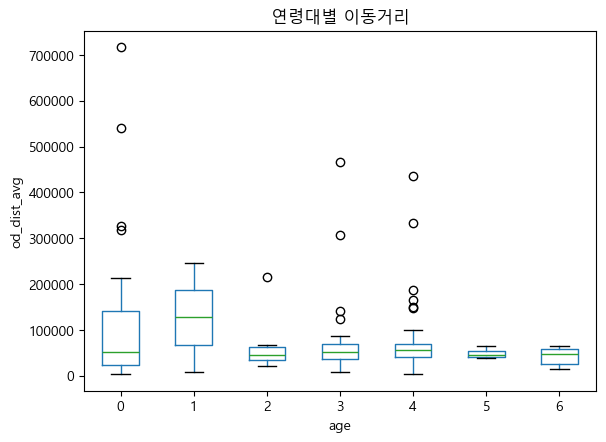

In [32]:
plt.figure(figsize=(10, 6))
df_to_muju.boxplot(column='od_dist_avg', by='age', grid=False)
plt.xlabel('age')
plt.ylabel('od_dist_avg')
plt.title('연령대별 이동거리')
plt.suptitle('')  # 기본 제목 제거
plt.show()

- 100,000m = 100km.
- 무주-서울이 200km, 대전넘어천안/대구/예천/광주/서해끝 정도가 100km. 그럼 200km 이상은 다 오류로 인한 이상치??
- 일단 이상치 제거해야할 듯.(250km밑만 보기)

In [50]:
# age별로 그룹화하고 od_dist_avg 컬럼을 평균
age_dist_avg = df_to_muju.groupby('age')['od_dist_avg'].mean().reset_index()
age_dist_avg['od_dist_avg'] = age_dist_avg['od_dist_avg'].astype(int)
age_dist_avg

,age,od_dist_avg
0,0,103595
1,1,127400
2,2,60055
3,3,68503
4,4,77596
5,5,48514
6,6,41618


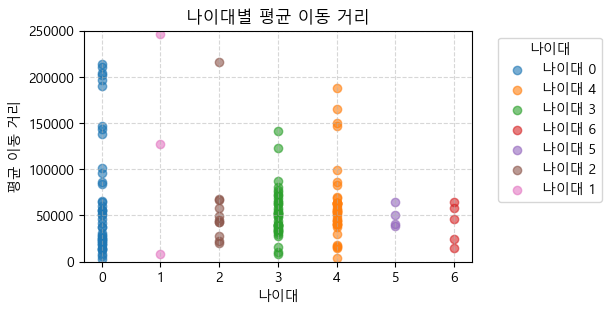

In [45]:
plt.figure(figsize=(5, 3))

# 각 나이대에 대해 점 그리기
for age in df_to_muju['age'].unique():
    age_data = df_to_muju[df_to_muju['age'] == age]
    plt.scatter([age] * len(age_data), age_data['od_dist_avg'], alpha=0.6, label=f'나이대 {age}')

plt.ylim(0, 250000)
plt.xlabel('나이대')
plt.ylabel('평균 이동 거리')
plt.title('나이대별 평균 이동 거리')
plt.legend(title='나이대', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- 9세 이하: 103595(평균). 0~50km에 엄청 많이 분포. 100km,150km도 조금씩 있고. 200km도 꽤 있음. 
- 10대: 127400(평균). 근데 3건밖에 없어서 유의미하게 말할 순 없는 듯. 엄청 가까이서 온거 하나랑, 130km하나, 250km하나(이건 이상치인가?)
- ㄴ -> 연령대별로 데이터 더 자세히 봐야할 듯. 
- 20대: 60055(평균). 25~75km에 분포. 엄청 가까이서 오는 경우는 없음. 20대는 아무래도 무주처럼 시골에 잘 안 살아서인가? 
- 30대: 68503(평균). 0~100km까지 엄청 다양. 그래도 주로 100km 내에서 옴.
- 40대: 77596(평균). 40대도 30대와 비슷.
- 50대: 48514(평균). 완전 50km 내외. 딱 50km내외에만 데이터가 있고 나머지는 없다는 건 좀 특이한듯. 50km반경에 어떤 지역들이 있는지 봐야겠다. 
- 60대: 41618(평균). 25~75km. 20대와 비슷. 50대와도 비슷.


- 전체적으로
- 특히 20대,50대,60대의 이동거리가 짧음. 무주읍 근처에 사시는 지역의 어르신들이 방문하시나봄.??
- 생각보다 멀리서 오는 20대는 없음. (20대 입장에서 멀리까지 굳이?라서 인가? 그래서 근처 지역 20대만 오는건가?)
- ㄴ 이것도 9/3데이터만으로 일반화하기 어려우니까 전체 데이터 분포도 봐야할듯.
- 30,40대는 확실히 엄청 많고 범위가 좀 넓음. 9세 이하도 함께. 가족단위로 많이 오는 것 같고, 가족단위는 멀리서도 오는 듯.
- ㄴ근데 되게 가까이서오는 데이터가 많은 것도 특이함. 핵가족이 무주근처에 많이 사나..? 그건 아닐 것 같은데, 아니면 주위 다른 여행지에서 오는 게 집계돼서 그런가? 이거 알아보기 위해서는 다른 컬럼들도 함께 봐야할 듯. 

- 특이한 점:
- 엄청 먼 이동거리는 9세 이하, 10대에서만 관측됨. 왤까 ?
- 9세 이하, 10대는 어른이랑 같이 이동할텐데, 비교적 먼거리를 이동하면서 왜 보호자(30대~)의 거리는 저렇게 적지 ?? 30,40대에서 한개씩 있긴 한데,, 학교나 학원 단체 여행 이런건가? 아니면 어떤 시스템적인 이유로 수집이 안되거나 자녀한테로 통합돼서 수집되는 건가?
- 이건 일단, 9/3데이터뿐만 아니라, 다른 데이터 다 포함해서 그런지도 보고 분석해봐야겠다.

- 해야할 일: (숫자는 우선순위)
- 연령대별로 데이터 자체 보기 2 
- 전체 데이터 분포도 보기 4
- 위에 답변하기 3 5
- 평균이동거리말고도 다른 컬럼도 보기 1 ●딱히 볼거 더 없음 - stay데이터로 더 봐야할듯 
- 평균이동거리와 교통수단 관계 확인 1과함께 ●

---

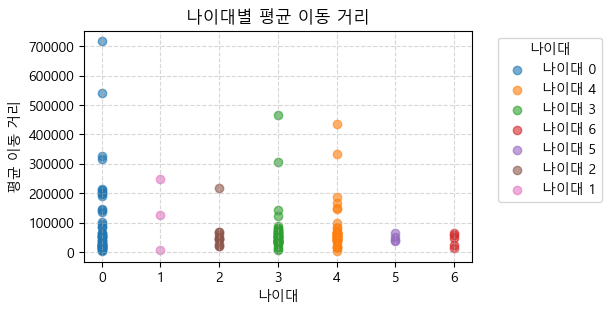

In [52]:
plt.figure(figsize=(5, 3))

# 각 나이대에 대해 점 그리기
for age in df_to_muju['age'].unique():
    age_data = df_to_muju[df_to_muju['age'] == age]
    plt.scatter([age] * len(age_data), age_data['od_dist_avg'], alpha=0.6, label=f'나이대 {age}')

plt.xlabel('나이대')
plt.ylabel('평균 이동 거리')
plt.title('나이대별 평균 이동 거리')
plt.legend(title='나이대', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

이상치 제거 안하면 어떨지 궁금해서 봤는데 큰 차이 없는듯.
근데 10대는 데이터 수는 21인데 왤케 적지?? 아ㅏ아아아 데이터포인트는 3개가 맞고, od_cnts에 값들이 여러개니까 그거 다 합해서 그런듯. 


## 4

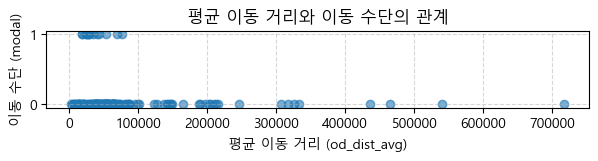

In [55]:
plt.figure(figsize=(7, 1))
plt.scatter(df_to_muju['od_dist_avg'], df_to_muju['modal'], alpha=0.6)

plt.xlabel('평균 이동 거리 (od_dist_avg)')
plt.ylabel('이동 수단 (modal)')
plt.title('평균 이동 거리와 이동 수단의 관계')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- 0: 차량, 1: 시내버스
- 시내버스는 0~100km 사이에만 이용.
- 시내버스 이외 전부 차량으로 이동.
- 시외고속버스/철도, 도보/지하철 이용은 9/3엔 없었음.
- 근데 50km도 꽤 먼데 어떻게 시내버스인거지 ㅡ.ㅡ 50km는 무주에서부터 대전, 김천, 거창까지 거리임. 

### 시내버스 타는 경우 자세히 보기: 어느 지역에서 오는지 

In [12]:
modal_1 = (df_to_muju['modal'] == 1)
df_modal_1 = df_to_muju[modal_1].sort_values(by='end_time')
df_modal_1

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
155065,4573033000,4573025000,20230903,11:00,11:00,1,4,1.0,5.0,5,18289,17,8
2841847,4573032000,4573025000,20230903,12:00,12:00,0,3,1.0,5.0,5,34843,17,6
43361,4573032000,4573025000,20230903,13:00,13:00,0,0,1.0,5.0,5,25491,29,12
290847,4573032000,4573025000,20230903,13:00,13:00,1,4,1.0,5.0,5,40550,37,6
160516,4573032000,4573025000,20230903,13:00,13:00,0,4,1.0,5.0,5,29654,26,7
309199,4573032000,4573025000,20230903,12:00,13:00,1,3,1.0,5.0,5,53572,33,9
3149396,4573033000,4573025000,20230903,12:00,13:00,1,3,1.0,5.0,5,77448,62,6
1101019,4573033000,4573025000,20230903,14:00,14:00,0,2,1.0,5.0,5,27975,18,5
2183530,4573032000,4573025000,20230903,15:00,15:00,1,0,1.0,5.0,5,29130,45,14
2233452,4573032000,4573025000,20230903,14:00,15:00,0,3,1.0,5.0,5,69171,50,6


In [13]:
df_modal_1['origin_hdong_cd'].unique()

array([4573033000, 4573032000, 4573034000], dtype=int64)

- 4573033000: 무주군 적상면
- 4573032000: 무주군 설천면
- 4573034000: 무주군 안성면

- 3149396행: 적상면->반딧불축제 77448m(77km)
- 실제: 차로 8.4km 10분, 대중교통 20분
- od_dist_avg, od_duration_avg 이 이상해서 논의해봐야할 듯
- 또 특이한건 5-60대는 없음

---

# 5

In [14]:
# od_dist_avg와 od_duration_avg 상관관계 보기 

# 상관계수
df_to_muju[['od_dist_avg', 'od_duration_avg']].corr()

,od_dist_avg,od_duration_avg
od_dist_avg,1.0000,0.8403
od_duration_avg,0.8403,1.0000


In [19]:
# ㄴ 양의 관계가 강하다

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(2):
    VIF = variance_inflation_factor(df_to_muju[['od_dist_avg', 'od_duration_avg']], i)
    print(VIF)

5.521255317827367
5.521255317827367


In [20]:
# 전혀 상관없으면 1, 10이상부터 컬럼 삭제
# 5: 중간에서 높은 정도 

<Figure size 500x300 with 0 Axes>

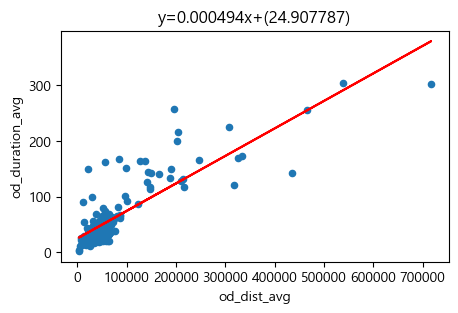

In [27]:
# scatter plot과 trend line

plt.figure(figsize=(5, 3))
df_to_muju.plot(kind='scatter', x='od_dist_avg', y='od_duration_avg', figsize=(5, 3))
fit_weight = np.polyfit(df_to_muju['od_dist_avg'], df_to_muju['od_duration_avg'], 1) # x값, y값에 열 지정해주고 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)

plt.plot(df_to_muju['od_dist_avg'], trend_f(df_to_muju['od_dist_avg']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.show()

---

# 6

나이대별로 자세히 보기. 

In [38]:
for i in range(0,7):
    rows = (df_to_muju['age'] == i)
    df_age = df_to_muju[rows].sort_values(by='end_time')
    print("%d0대"%(i))
    display(df_age)

00대


,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
257408,4573032000,4573025000,20230903,09:00,09:00,1,0,0.0,0.0,5,7796,22,14
2005936,4573032000,4573025000,20230903,09:00,10:00,0,0,0.0,5.0,5,50791,42,12
118783,4471025000,4573025000,20230903,09:00,10:00,1,0,0.0,0.0,5,86529,61,14
133473,4573032000,4573025000,20230903,09:00,10:00,1,0,0.0,5.0,5,37115,30,14
1464082,4573032000,4573025000,20230903,11:00,11:00,0,0,0.0,5.0,5,13744,28,12
2105559,4573031000,4573025000,20230903,10:00,11:00,1,0,0.0,5.0,5,64981,33,14
877021,4573035000,4573025000,20230903,11:00,12:00,1,0,0.0,5.0,5,13522,54,28
2834738,4573032000,4573025000,20230903,10:00,12:00,1,0,0.0,5.0,5,12401,90,14
2668550,4573034000,4573025000,20230903,11:00,12:00,1,0,0.0,5.0,5,19388,43,14
215557,3023053300,4573025000,20230903,11:00,12:00,0,0,0.0,0.0,5,55439,70,12


10대


,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
689463,4159062000,4573025000,20230903,10:00,13:00,0,1,0.0,0.0,5,246864,166,7
2707161,4573032000,4573025000,20230903,10:00,13:00,0,1,0.0,5.0,5,127190,164,7
1453098,4573033000,4573025000,20230903,13:00,13:00,0,1,0.0,5.0,5,8147,13,7


20대


,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
2291040,4573033000,4573025000,20230903,11:00,11:00,0,2,0.0,5.0,5,20481,24,5
2708133,4573032000,4573025000,20230903,10:00,11:00,1,2,0.0,5.0,5,58589,31,7
2753153,4573032000,4573025000,20230903,11:00,11:00,0,2,0.0,5.0,5,42885,38,10
3103510,4573032000,4573025000,20230903,10:00,11:00,0,2,0.0,5.0,5,67220,36,5
1099070,4573032000,4573025000,20230903,11:00,12:00,0,2,0.0,5.0,5,67920,54,5
1533945,4573034000,4573025000,20230903,10:00,12:00,0,2,0.0,5.0,5,216408,117,10
601917,4573032000,4573025000,20230903,12:00,12:00,0,2,0.0,5.0,5,48902,25,5
3183908,4573033000,4573025000,20230903,14:00,14:00,0,2,0.0,5.0,5,22190,16,5
1101019,4573033000,4573025000,20230903,14:00,14:00,0,2,1.0,5.0,5,27975,18,5
3188817,4573032000,4573025000,20230903,13:00,14:00,1,2,0.0,5.0,5,42897,38,5


30대


,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
2230846,4573032000,4573025000,20230903,09:00,10:00,1,3,0.0,5.0,5,55568,75,9
1641227,4573032000,4573025000,20230903,09:00,10:00,0,3,0.0,5.0,5,39843,29,9
1185612,4573033000,4573025000,20230903,09:00,10:00,0,3,0.0,5.0,5,38186,47,6
1961380,4573033000,4573025000,20230903,09:00,10:00,1,3,0.0,5.0,5,34493,41,6
2902546,4573032000,4573025000,20230903,10:00,11:00,0,3,0.0,5.0,5,123253,86,9
2846410,4573032000,4573025000,20230903,10:00,11:00,1,3,0.0,5.0,5,52507,39,21
2734978,4573035000,4573025000,20230903,11:00,11:00,1,3,0.0,5.0,5,10532,13,6
244934,4573032000,4573025000,20230903,11:00,11:00,0,3,0.0,5.0,5,75891,38,6
619031,4573035000,4573025000,20230903,10:00,11:00,0,3,0.0,5.0,5,64516,21,6
1351836,4573032000,4573025000,20230903,09:00,11:00,1,3,0.0,5.0,5,141761,126,6


40대


,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
2283351,4573032000,4573025000,20230903,09:00,09:00,0,4,0.0,5.0,5,63205,21,11
550354,4573032000,4573025000,20230903,09:00,10:00,1,4,0.0,5.0,5,53475,48,6
1547621,4573032000,4573025000,20230903,10:00,10:00,1,4,0.0,5.0,5,43710,27,6
1742151,4374025000,4573025000,20230903,10:00,11:00,0,4,0.0,0.0,5,41005,41,5
3188675,4573033000,4573025000,20230903,10:00,11:00,0,4,0.0,5.0,5,39669,34,5
461930,4573035000,4573025000,20230903,11:00,11:00,0,4,0.0,5.0,5,4195,2,5
3190950,4573033000,4573025000,20230903,09:00,11:00,0,4,0.0,5.0,5,149749,143,5
137587,4573032000,4573025000,20230903,10:00,11:00,0,4,0.0,5.0,5,68905,36,18
155065,4573033000,4573025000,20230903,11:00,11:00,1,4,1.0,5.0,5,18289,17,8
1053971,4573032000,4573025000,20230903,12:00,12:00,0,4,0.0,5.0,5,44763,27,5


50대


,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
1707019,4573033000,4573025000,20230903,11:00,11:00,1,5,0.0,5.0,5,38152,18,5
1956735,4573032000,4573025000,20230903,11:00,12:00,1,5,0.0,5.0,5,50809,64,14
2693017,4573032000,4573025000,20230903,11:00,12:00,0,5,0.0,5.0,5,64660,64,6
1926154,4573032000,4573025000,20230903,12:00,13:00,1,5,0.0,5.0,5,40437,46,5


60대


,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
2473118,4573032000,4573025000,20230903,09:00,10:00,1,6,0.0,5.0,5,64623,69,5
972222,4573032000,4573025000,20230903,11:00,12:00,1,6,0.0,5.0,5,57664,69,7
26493,4573033000,4573025000,20230903,12:00,12:00,1,6,0.0,5.0,5,14520,26,7
499525,4573032000,4573025000,20230903,11:00,12:00,0,6,0.0,5.0,5,46549,58,5
2493913,4573033000,4573025000,20230903,18:00,18:00,0,6,0.0,5.0,5,24738,27,5


분석 시에 od_cnts를 반영해야할듯. 

1. end_time
   - 00대: 9~21시
   - 10대: 13시
   - 20대: 11~15시
   - 30대: 10~20시
   - 40대: 9~19시
   - 50대: 11~13시
   - 60대: 10~18시
   - 10/20대의 경우 저녁이 되기 전에 도착, 00/30/40대는 전시간대에 도착, 50/60대는 거의 오전, 점심때 도착, 또는 저녁
2. gender
   - 성별은 따로 보지 않아도 될 것 같고, 거리는 아래에서 본듯.
3. origin_hdong_cd
   - 시각화해서 보면 좋을 것 같다. 